Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd

# load csv files to be merged
bike_stations = pd.read_csv('../data/bike_stations_madrid.csv', index_col=0)
foursquare_details = pd.read_csv('../data/foursquare_restaurants.csv', index_col=0)
yelp_details = pd.read_csv('../data/yelp_restaurants.csv', index_col=0)

bike_stations = bike_stations.rename(columns={'name': 'station_name'})

bikes_and_yelp = pd.merge(bike_stations, yelp_details, how='inner', on='station_name')
#final_merge = pd.merge(first_merge, yelp_details, how='inner', on='station_name')
bikes_and_yelp.head()

# testing some stuff
bikes_and_yelp.to_csv('bike_and_yelp.csv', index=False)
print(f'Bike_and_Yelp Shape: {bikes_and_yelp.shape}')
bikes_and_yelp.isnull().sum()


Bike_and_Yelp Shape: (800, 12)


id                 0
station_name       0
latitude           0
longitude          0
free_bikes         0
empty_slots        0
restaurant_name    0
distance           0
address            0
categories         1
rating             0
review_count       0
dtype: int64

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

**EDA Question 1: Are restaurants that tend to be rated higher located closer or futher away from bike stations?**

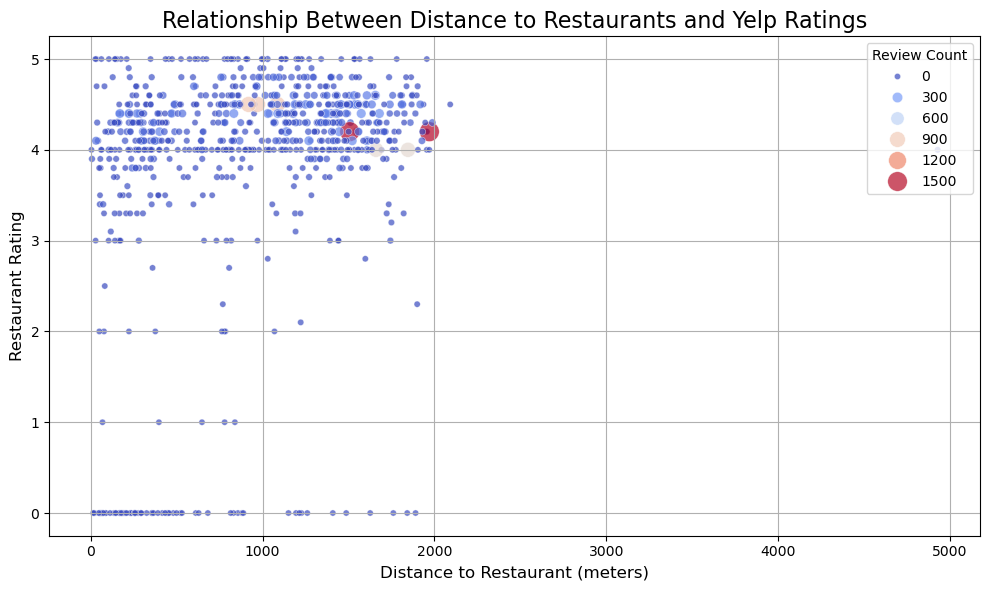

In [27]:
# Ensure numerical columns do not have missing values
bikes_and_yelp_cleaned = bikes_and_yelp.dropna(subset=['distance', 'rating'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bikes_and_yelp_cleaned, 
    x='distance', 
    y='rating', 
    hue='review_count', 
    size='review_count', 
    palette='coolwarm', 
    sizes=(20, 200), 
    alpha=0.7
)

# Add plot titles and labels
plt.title('Relationship Between Distance to Restaurants and Yelp Ratings', fontsize=16)
plt.xlabel('Distance to Restaurant (meters)', fontsize=12)
plt.ylabel('Restaurant Rating', fontsize=12)
plt.legend(title='Review Count', loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In order to make any inferences on the relationship between ratings and distance to restaurants, we have to look at the clustering of points on the graph above. If there were to be a correlation between the two variables, we would see points clusted together in areas either closer or further away from restaurants. For example, if people enjoyed restaurants that happened to be closer to a bike station, we would see clustering in the top left corner of the graph. Given that the points are pretty evenly distributed, there does not seem to be a relationship between a bike station's distance to a restaurant and that restaurants' ratings. However, it is notable to state that the restaurants with the highest number of reviews are located further away from bike stations, as indicated by the red bubbles.

**EDA Question 2: Which restaurant category is most common near these bike stations in Madrid?**

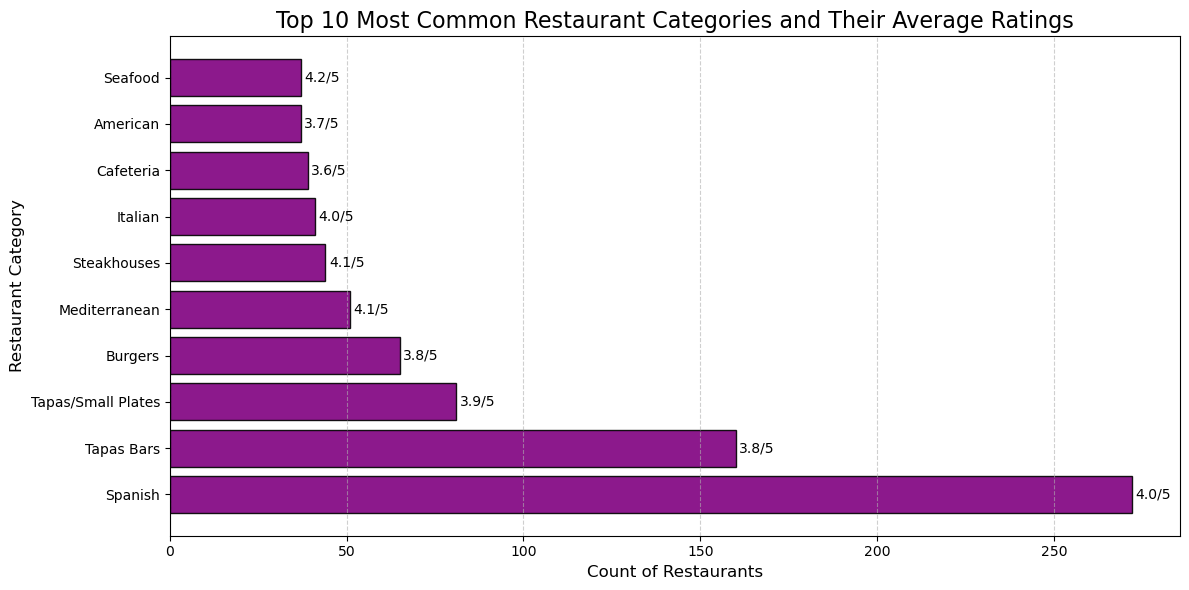

In [36]:
import matplotlib.pyplot as plt

# Plot the counts as a bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(
    category_stats.index,
    category_stats['count'],
    color='purple',
    edgecolor='black',
    alpha=0.9
)

# Annotate the average ratings on the bars
for bar, avg_rating in zip(bars, category_stats['avg_rating']):
    plt.text(
        bar.get_width() + 1,  
        bar.get_y() + bar.get_height() / 2,  
        f"{avg_rating:.1f}/5",  
        fontsize=10,
        va='center'
    )

# Add titles and labels
plt.title('Top 10 Most Common Restaurant Categories and Their Average Ratings', fontsize=16)
plt.xlabel('Count of Restaurants', fontsize=12)
plt.ylabel('Restaurant Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The leading restaurant category would be "Spanish". Though it is the most common restaurant category, the category with the highest average rating is actually seafood restaurants. 

**EDA Question 3: What is the spread and distribution of ratings for restaurants near each bike station?**

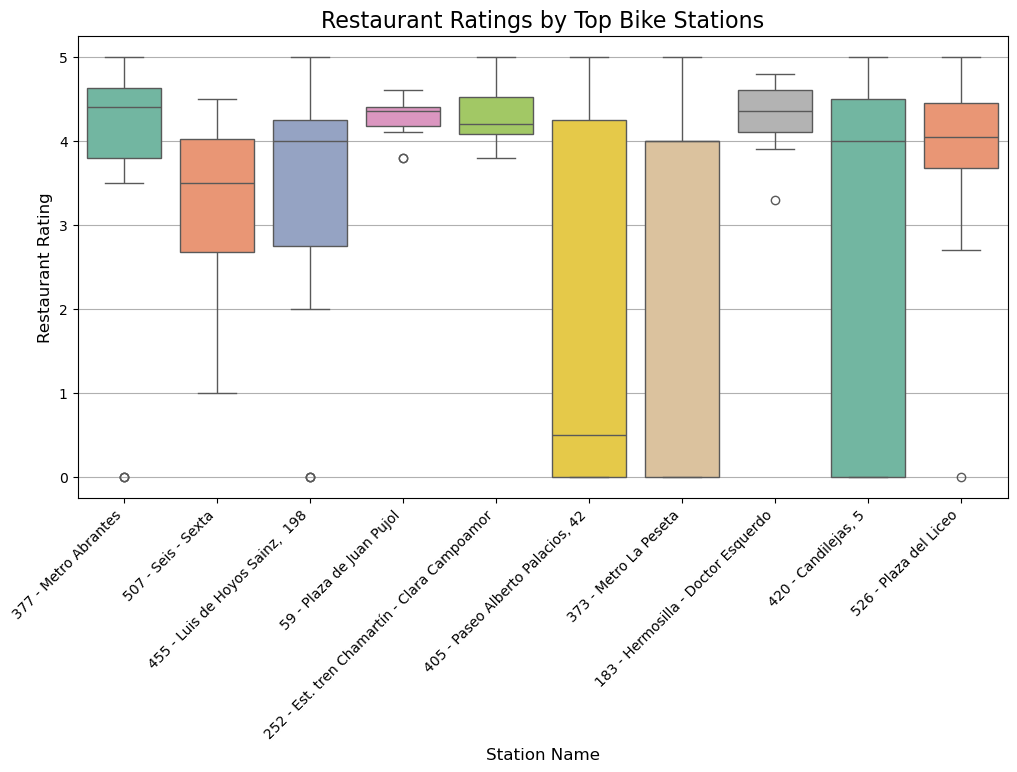

In [24]:
plt.figure(figsize=(12, 6))
top_stations = bikes_and_yelp['station_name'].value_counts().head(10).index
sns.boxplot(
    data=bikes_and_yelp[bikes_and_yelp['station_name'].isin(top_stations)],
    x='station_name', 
    y='rating',
    hue='station_name',
    palette='Set2'
)

plt.title('Restaurant Ratings by Top Bike Stations', fontsize=16)
plt.xlabel('Station Name', fontsize=12)
plt.ylabel('Restaurant Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


This visualization identifies outliers and the range of restaurant ratings per station. Bike stations with higher median ratings may be in areas with better dining options. Stations with high average ratings and reasonable ranges are Metro Abrantes, Plaza de Juan Pujol, Doctor Esquerdo, and Plaza del Liceo. Paseo Alberto Palacios. Betro La Peseta, and Candilejas has very large range of restaurant ratings, indicating that dining options are quite variable in these areas.

**EDA Question 4: Which restaurants have the highest review counts, and which stations are they nearest to?**

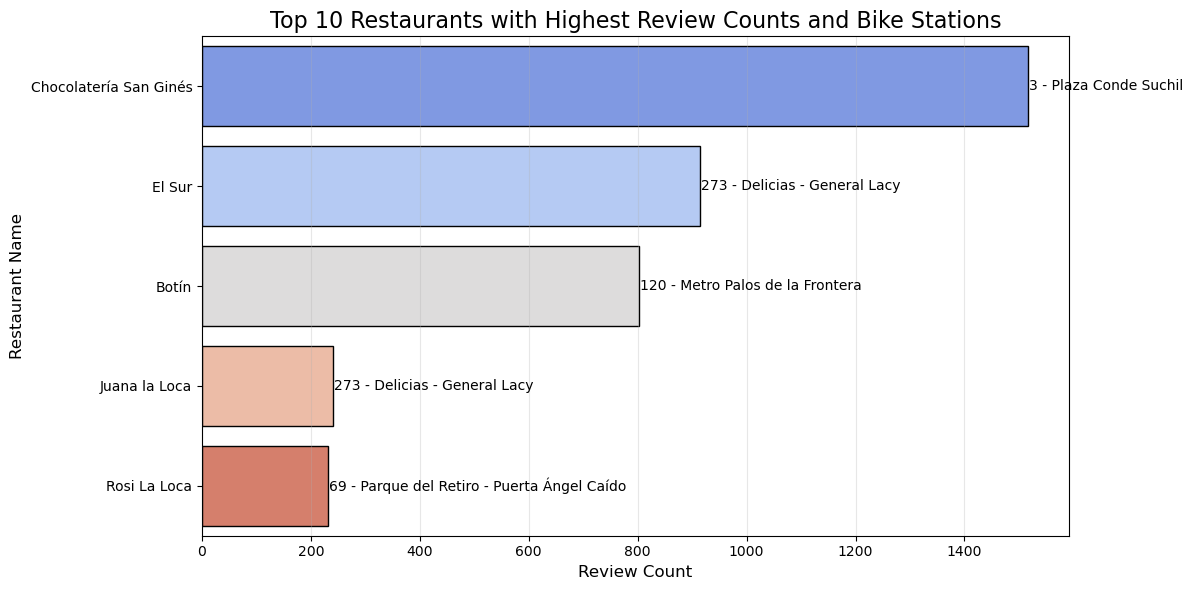

In [40]:
top_restaurants = bikes_and_yelp[['restaurant_name', 'station_name', 'review_count']].sort_values(by='review_count', ascending=False).head(10)
# Create the bar plot with palette and hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_restaurants, 
    x='review_count', 
    y='restaurant_name', 
    hue='restaurant_name', 
    palette='coolwarm', 
    dodge=False, 
    edgecolor='black'
)

# Add labels for the corresponding bike station next to each bar
for i, bar in enumerate(ax.patches):
    # Find the position of the bar
    bar_width = bar.get_width()
    bar_y = bar.get_y()
    bar_height = bar.get_height()
    
    # Retrieve the bike station name for the corresponding restaurant
    station_name = top_restaurants.iloc[i]['station_name']
    
    # Add the label as text next to the bar
    plt.text(
        bar_width + 2,  # Position text slightly to the right of the bar
        bar_y + bar_height / 2,  # Center text vertically
        station_name,  # Add the bike station name
        fontsize=10,
        va='center'
    )

# Add labels and title
plt.title('Top 10 Restaurants with Highest Review Counts and Bike Stations', fontsize=16)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


The Chogolateria San Gines has the highest review count of all the restaurants in the database. This restaurant is closest to the Plaza Conde Suchil. This station can be futher explored to determine if bike availability, and even restaurant ratings may correlate to the popularity of this restaurant.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [44]:
import sqlite3

db_path = '../data/bikes_and_yelp.db'
conn = sqlite3.connect(db_path)

# Insert the merged DataFrame into the SQLite database
bikes_and_yelp.to_sql('bikes_and_yelp', conn, if_exists='replace', index=False)

conn.close()
print(f"Success!")

Success!


Look at the data before and after the join to validate your data.

In [51]:
# Check the shape and preview of bike_stations
print("Bike Stations Shape:", bike_stations.shape)
print("Bike Stations Sample:")
print(bike_stations.head())

# Check the shape and preview of yelp_details
print("\nYelp Details Shape:", yelp_details.shape)
print("Yelp Details Sample:")
print(yelp_details.head())


# Check the shape and preview of bikes_and_yelp after the join
print("\nBikes and Yelp Shape:", bikes_and_yelp.shape)
print("Bikes and Yelp Sample:")
print(bikes_and_yelp.head())


Bike Stations Shape: (610, 6)
Bike Stations Sample:
                                 id  \
0  01f5011f76069b1e81a11d4d51dd9d1d   
1  025b1722c61309b46f4f3833c05d96a2   
2  0293685e90e89cbd15dfb4ae7db3551e   
3  02c587332ef68d67fa22a21b242fd857   
4  03616e7fc57d3e370fb9126349925d27   

                                station_name   latitude  longitude  \
0                       377 - Metro Abrantes  40.380918  -3.727836   
1                         507 - Seis - Sexta  40.448450  -3.596503   
2  192 - Avda. de los Toreros - Fco. Silvela  40.431826  -3.671468   
3                  333 - Illescas - Camarena  40.392175  -3.756232   
4                     3 - Plaza Conde Suchil  40.430322  -3.707254   

   free_bikes  empty_slots  
0           9           14  
1          19            5  
2           9           17  
3           9           14  
4          12            7  

Yelp Details Shape: (800, 6)
Yelp Details Sample:
                           restaurant_name     distance     address